In [ ]:
'''
"the petals on this flower are white with a yellow center"
"this flower has a lot of small round pink petals."
"this flower is orange in color, and has petals that are ruffled and rounded."
"the flower has yellow petals and the center of it is brown."
"this flower has petals that are blue and white."
'''

## report

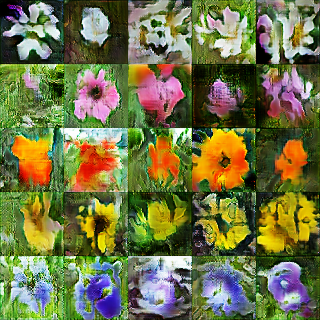

In [7]:
from PIL import Image
from IPython import display
img = Image.open('/home/norahlin/DL/Comp_3/samples/sample.jpg')
display.display(img)

(因為code太多所以report額外寫)
1. 關於text encoder  
    除了助教給的code之外還額外嘗試了三種encode方式  
    a. bidirectional rnn  
    b. sentence transformer  
    c. universal-sentence-encoder (by tensorflow)    
    最後多方嘗試後發現univeral-sentence-encoder表現的最好，不過其實sentence trransformer呈現出來的圖片效果較好，只是不知為何kaggle分數比較低，所以最上傳的還是用universal做encoder的訓練出來的模型(這也可能是導致我們從public變成private後排名大幅掉落的原因) 
2. 關於GAN  
    一開始使用助教給的code train出來一些奇奇怪怪的東西，所以後來就直接參考別人做DCGAN比較常見的架構，並加入upsampling，改完模型之後train出來的東西就變得比較正常了。  
    除了更改模型架構以外我們也使用了一些老師上課講過或是網路上有的一些技巧：  
    a. 使用conditional gan -> 加入一個錯誤的caption與正常的image丟給discriminator，避免訓練的時候G和D忽略text的部分  
    b. 將input map至-1~1之間  
    c. 使用spetral normalizatoin(這個模型train出來的效果怪怪的，只是我們沒找到原因)  
    d. 將D的optimizer改成SGD，G則維持原本的Adam  
    e. 調整G和D訓練比例(最後發現lab中使用5次D接1次G最好)  
    f. 使用improve-wgan(這個是提升效果最明顯的一個)  
3. 結論   
    在訓練的時候可以感受到為何comp3會比前兩次有更多的時間，因為GAN的訓練難度真的太高，而且常常train到後面會突然爆掉，畫出完全沒有意義的圖片，所以需要時不時去關心他，若發現爆掉要在restore回之前正常的地方重新開始。 雖然我們已經常數過很多方法，但從畫出來的圖片可以看到離助教之前給的demo圖還有很大的差距，可能在比賽過程中我們有漏掉一些關鍵的方法沒有考慮到導致效果在後期一直提升不上去，不過後來我們有想到data augmentation是一個尚未嘗試過的方法，只是時間上又已經太敢就沒有再實驗了。